In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Desktop/hawaii.sqlite")

In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [8]:
Base.classes.keys()

['measurement', 'station']

In [9]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
session = Session(engine)

In [11]:
dates_2017 = session.query(Measurement).\
    filter(Measurement.date > 2017)

precipitation_list = []
date_list = []

for measurements in dates_2017:
    precipitation_list.append(measurements.prcp)
    
for measurements in dates_2017:
    date_list.append(measurements.date)
    
precipitation_dict = {"Precipitation": precipitation_list}

In [12]:
df = pd.DataFrame(data=precipitation_dict, index=date_list)

df.index.name = "Date"

df.head()

,Precipitation
Date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


In [13]:
df.sort_index().head()

,Precipitation
Date,
2017-01-01,0.00
2017-01-01,0.00
2017-01-01,0.03
2017-01-01,0.03
2017-01-01,0.29


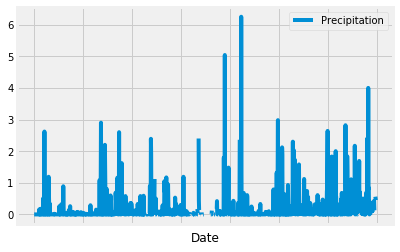

In [14]:
df.plot()

In [15]:
stations = session.query(Station).count()

stations

print("Number of Stations: ", str(stations))

Number of Stations:  9


In [30]:
Measurement_query = session.query(Measurement)

station_list = []

for measurements in Measurement_query:
    station_list.append(measurements.station)

In [31]:
pd.value_counts(station_list)

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [26]:
max_station = station_list[0]

print("The station with the most observatins is: ", str(max_station))

The station with the most observatins is:  USC00519397


In [49]:
recent_max = session.query(Measurement).\
    filter(Measurement.date > 2017).order_by(Measurement.tobs)

tobs_list = []

for measurement in recent_max:
    tobs_list.append(measurement.tobs)
    
pd.value_counts(tobs_list).head()

76.0    120
74.0    117
77.0    111
78.0    106
75.0     95
dtype: int64

(array([  9.,  15.,  58.,  66., 180., 166., 186., 326., 193., 182.,  13.,
          3.]),
 array([58.        , 60.41666667, 62.83333333, 65.25      , 67.66666667,
        70.08333333, 72.5       , 74.91666667, 77.33333333, 79.75      ,
        82.16666667, 84.58333333, 87.        ]),
 <a list of 12 Patch objects>)

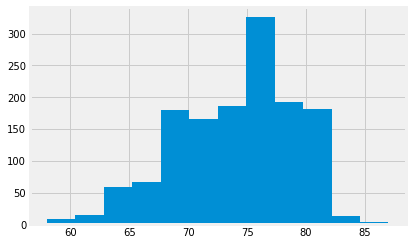

In [55]:
bins = 12
y = tobs_list

plt.hist(y, bins=bins)

In [25]:
temperature_query = session.query(Measurement).\
    filter(Measurement.date > 2/3/2016).filter(Measurement.date <2/6/2017)

temp_list

for measurement in temperature_query:
    temp_list.append(measurement.temp)

NameError: name 'temp_list' is not defined